## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [43]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

### Load the dataset

In [44]:
# reading the CSV file into pandas dataframe
tips_df = pd.read_csv("tips.csv")  

In [45]:
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 1. Make a list of categorical and numerical columns in the data.

In [46]:
#tips_df.info()
numCol = tips_df.select_dtypes(exclude='O').columns.to_list()
catCol = tips_df.select_dtypes(include='O').columns.to_list()

In [47]:
numCol

['total_bill', 'tip', 'size']

In [48]:
catCol

['sex', 'smoker', 'day', 'time']

### 2. Compute the average bill amount for each day.

In [49]:
tips_df.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

### 3. Which gender is more generous in giving tips?

In [50]:
tips_df.groupby('sex')['tip'].mean().idxmax()

'Male'

### 4. According to the data, were there more customers for dinner or lunch?

In [51]:
#tips_df['time'].value_counts()
tips_df.groupby('time')['size'].count().idxmax()

'Dinner'

### 5. Based on the statistical summary, comment on the variable 'tip'

In [52]:
#tips_df['tip'].sum()*100/tips_df['total_bill'].sum()
#om an average tip is $2.99, but max is 3 times of mean
tips_df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

### 6. Find the busiest day in terms of the orders?

In [53]:
tips_df['day'].value_counts().idxmax()
#tips_df.value_counts().sort_values(ascending=False).iloc[1]

'Sat'

### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

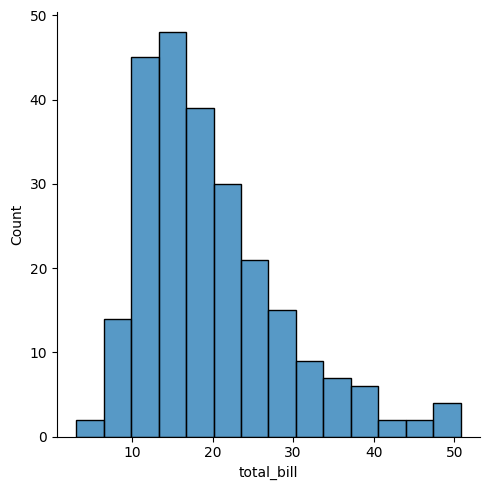

In [54]:
#tips_df.boxplot('total_bill')
sns.displot(tips_df['total_bill'])
plt.show()

In [55]:
tips_df['total_bill'].skew()
#positive value shows that its right skew

1.1332130376158205

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

In [56]:
tips_df['total_bill'].corr(tips_df['tip'])

#data['column1'].corr(data['column2'])
#its not an strong dependencies but a moderate dependency

0.6757341092113642

<Axes: xlabel='total_bill', ylabel='tip'>

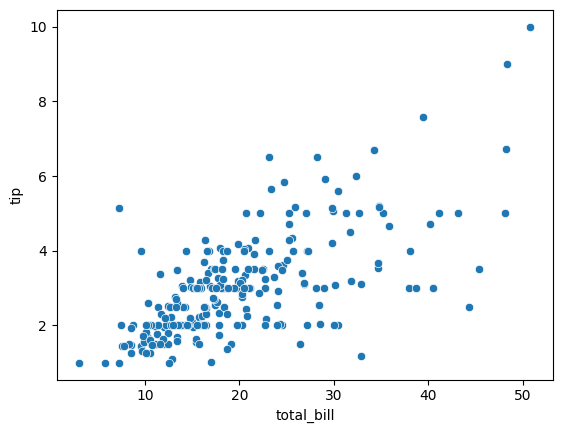

In [57]:
sns.scatterplot(x='total_bill',y='tip',data=tips_df)

### 9. What is the percentage of males and females in the dataset? and display it in the plot

<function matplotlib.pyplot.show(close=None, block=None)>

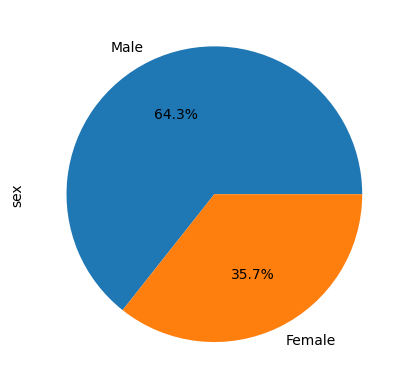

In [58]:
#female = 0
#male = 0
#for row in tips_df:
#    if (tips_df['sex']).any()=='Female':
#       female = female+1             
#    else:
#       male = male+1
#print(male)
#print(female)
tips_df['sex'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

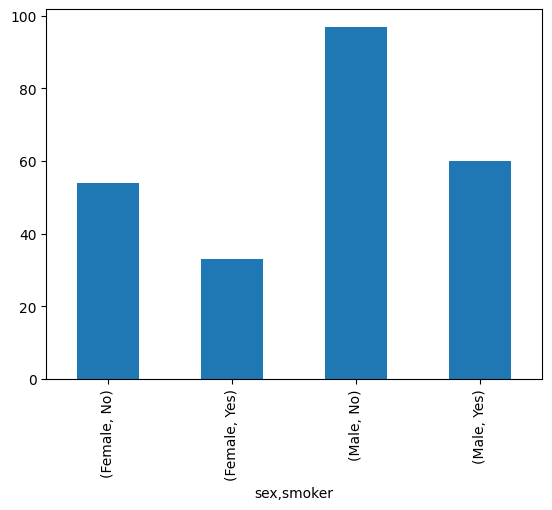

In [59]:
tips_df.groupby('sex')['smoker'].value_counts().plot(kind='bar')
plt.show()


### 11. Compute the average tip amount given for different days and display it in the plot.

In [60]:
tips_df.groupby('day')['tip'].mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

<Axes: xlabel='day', ylabel='tip'>

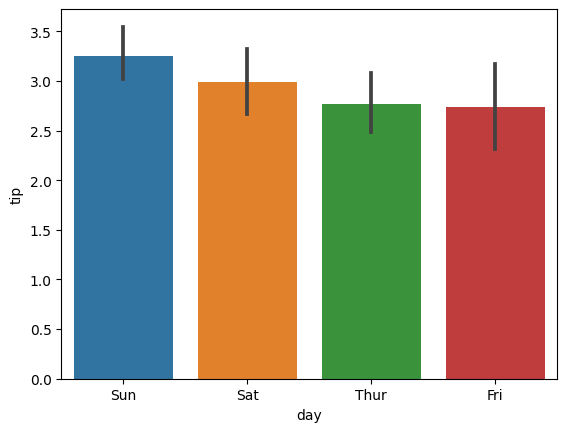

In [61]:
sns.barplot(x='day',y='tip',data=tips_df)

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

In [62]:
tips_df['total_bill'].corr(tips_df['size'])


0.5983151309049022

<Axes: xlabel='size'>

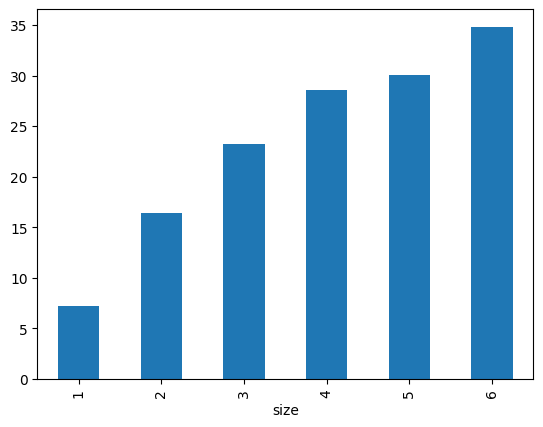

In [63]:
tips_df.groupby('size')['total_bill'].mean().plot(kind='bar')

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

<Axes: title={'center': 'total_bill'}, xlabel='sex'>

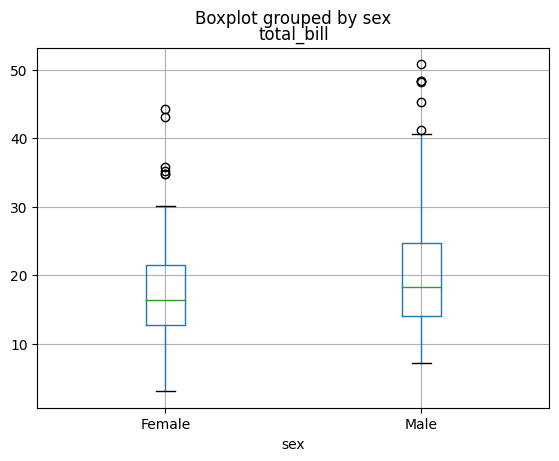

In [64]:
tips_df.boxplot(by ='sex', column =['total_bill'])

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [65]:
tips_df.groupby(['time','day'])['total_bill'].max().loc['Lunch']

day
Fri     16.27
Thur    43.11
Name: total_bill, dtype: float64

In [66]:
tips_df.groupby(['time','day'])['total_bill'].max().loc['Dinner'][['Sat','Sun']]
#maximum is on 'dinner'

day
Sat    50.81
Sun    48.17
Name: total_bill, dtype: float64

### 15. Compute the percentage of missing values in the dataset.

In [67]:
tips_df.isnull().sum()/len(tips_df)*100

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [68]:
q1=len(tips_df[tips_df.duplicated()])
q1

1

In [69]:
tips_df.drop_duplicates(inplace=True)
q1=len(tips_df[tips_df.duplicated()])
q1

0

### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

<Axes: >

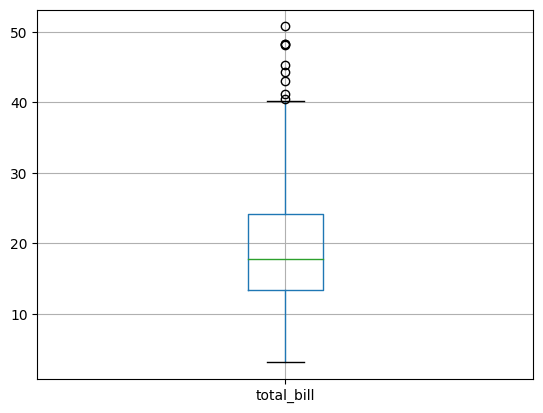

In [70]:
#before Log transformations
tips_df.boxplot('total_bill')


<Axes: >

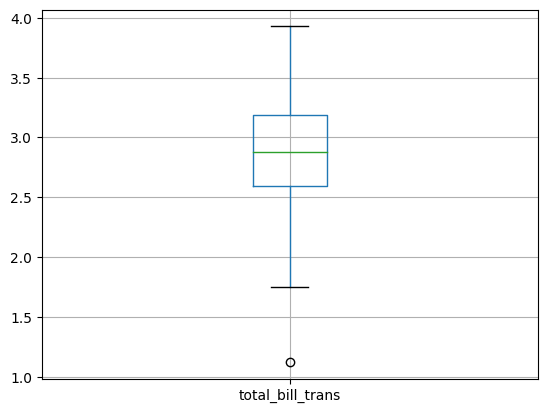

In [71]:
#after ransformations
tips_df['total_bill_trans']= np.log(tips_df['total_bill'])
tips_df.boxplot('total_bill_trans')


### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

<Axes: >

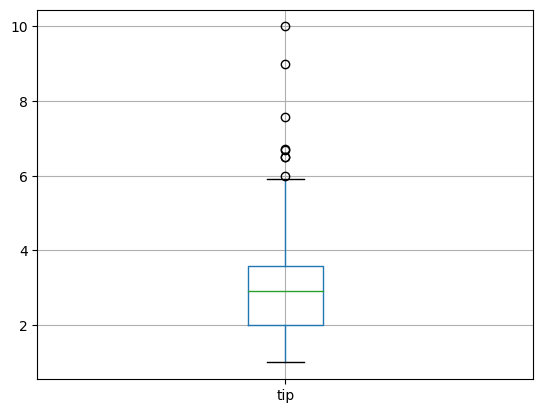

In [72]:
tips_df.boxplot('tip')

#although we have one more outlier near 1, but we can neglect it because earliear we had 6 outliers

<Axes: >

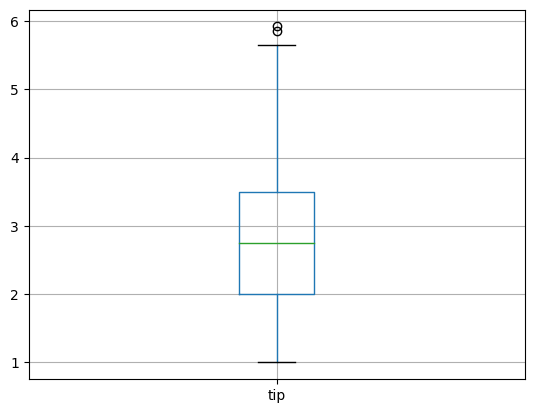

In [73]:
q1=tips_df['tip'].quantile(0.25)
q3=tips_df['tip'].quantile(0.75)
IQR=q3-q1

lower=q1-(1.5*IQR)
upper=q3+(1.5*IQR)

outliars=tips_df.loc[(tips_df['tip']<upper)&(tips_df['tip']>lower)]
outliars.boxplot('tip')

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [74]:
tips2=pd.get_dummies(tips_df,drop_first='True')
tips2.sample(5)

,total_bill,tip,size,total_bill_trans,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
41,17.46,2.54,2,2.859913,1,0,0,1,0,0
201,12.74,2.01,2,2.544747,0,1,0,0,1,1
113,23.95,2.55,2,3.175968,1,0,0,1,0,0
46,22.23,5.00,2,3.101443,1,0,0,1,0,0
189,23.10,4.00,3,3.139833,1,1,0,1,0,0


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [75]:
tbMax=tips_df['total_bill'].max()
tbMin=tips_df['total_bill'].min()
rangeOFbill=tbMax-tbMin
print(rangeOFbill)

47.74


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [76]:
tips_df = pd.read_csv("tips.csv")  
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [77]:
tips2 = pd.get_dummies(tips_df,drop_first=True)
tips2.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,0,0,0,1,0,0
1,10.34,1.66,3,1,0,0,1,0,0
2,21.01,3.50,3,1,0,0,1,0,0
3,23.68,3.31,2,1,0,0,1,0,0
4,24.59,3.61,4,0,0,0,1,0,0


In [78]:
X = tips_df.drop('tip',axis=1) 
y = tips_df['tip']

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [79]:
## Split the data 
from sklearn.model_selection import  train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30) 
print(X_train.shape,X_test.shape) 
print(y_train.shape,y_test.shape) ## Scaling the data using min max scaling mm = MinMaxScaler() X_train.iloc[:,:2] = mm.fit_transform(X_train.iloc[:,:2]) X_test.iloc[:,:2] = mm.transform(X_test.iloc[:,:2])

(170, 6) (74, 6)
(170,) (74,)


### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset from the CSV file
df = pd.read_csv('tips.csv')

# Perform one-hot encoding for the categorical columns
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'])

# Split the data into input features (X) and the target variable (y)
X = df_encoded.drop('tip', axis=1)  # Input features (excluding the 'tip' column)
y = df_encoded['tip']  # Target variable ('tip' column)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the R-squared value for the test data
r_squared_test = r2_score(y_test, y_pred)

# Print the R-squared value for the test data
print("R-squared value (Test Data): {:.4f}".format(r_squared_test))

R-squared value (Test Data): 0.4373


### Happy Learning:)